## 데이터 불러오기

In [1]:
### 와인 데이터 사용
# - 08_wine.csv 읽어 들이기
import pandas as pd
import numpy as np

In [5]:
file_path = './data/08_wine.csv'
wine = pd.read_csv(file_path)
wine

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0
...,...,...,...,...
6492,11.2,1.6,3.27,1.0
6493,9.6,8.0,3.15,1.0
6494,9.4,1.2,2.99,1.0
6495,12.8,1.1,3.34,1.0


In [6]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [7]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [8]:
wine.corr()

,alcohol,sugar,pH,class
alcohol,1.000000,-0.359415,0.121248,0.032970
sugar,-0.359415,1.000000,-0.267320,0.348821
pH,0.121248,-0.267320,1.000000,-0.329129
class,0.032970,0.348821,-0.329129,1.000000


In [15]:
wine_input = wine[['alcohol', 'sugar', 'pH']].to_numpy()
wine_target = wine['class'].to_numpy()

In [16]:
from sklearn.model_selection import train_test_split

In [18]:
train_input, test_input, train_target, test_target = \
train_test_split(wine_input, wine_target, random_state=42)

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

## 우선, 로지스틱회귀 분류로 해보기

In [ ]:
# 훈련/테스트 데이터 검증, 계수 및 y절편까지 출력...

In [28]:
from sklearn.linear_model import LogisticRegression

In [36]:
lr = LogisticRegression()
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.7859195402298851
0.7655384615384615


In [62]:
a, b, c = lr.coef_[0]

print('로지스틱 회귀 이진분류식 : ')
print(f'{a} * alcohol + {b} * pH + {c} * sugar + {lr.intercept_[0]}')

로지스틱 회귀 이진분류식 : 
0.5327386903154097 * alcohol + 1.6794058544783135 * pH + -0.7090216951866217 * sugar + 1.847139327926061


In [58]:
wine_scaled = ss.transform(wine_input)
class_pred = lr.predict(wine_scaled)

In [59]:
wine_pred = wine.copy()
wine_pred['class_pred'] = class_pred
wine_pred

,alcohol,sugar,pH,class,class_pred
0,9.4,1.9,3.51,0.0,0.0
1,9.8,2.6,3.20,0.0,1.0
2,9.8,2.3,3.26,0.0,1.0
3,9.8,1.9,3.16,0.0,1.0
4,9.4,1.9,3.51,0.0,0.0
...,...,...,...,...,...
6492,11.2,1.6,3.27,1.0,1.0
6493,9.6,8.0,3.15,1.0,1.0
6494,9.4,1.2,2.99,1.0,1.0
6495,12.8,1.1,3.34,1.0,1.0


In [60]:
print('총 갯수 [{}]건 중에, 정답갯수[{}]건, 오답 갯수[{}]건'.format(len(wine_pred), \
    sum(wine_pred['class'] == wine_pred['class_pred']), \
    len(wine_pred)-sum(wine_pred['class'] == wine_pred['class_pred'])))

총 갯수 [6497]건 중에, 정답갯수[5073]건, 오답 갯수[1424]건


In [61]:
print('총 100.0% 중 정답률[{}%], 오답률[{}%]' \
      .format(round(sum(wine_pred['class'] == wine_pred['class_pred'])/len(wine_pred) * 100, 2), \
              round(100 - sum(wine_pred['class'] == wine_pred['class_pred'])/len(wine_pred) * 100, 2)))

총 100.0% 중 정답률[78.08%], 오답률[21.92%]


## 결정트리(Decision Tree)
##### - 질문(조건)을 통해서 트리(True와 False) 2개씩으로 가지를 치면서 분류를 한다.
##### - 질문을 스스로 찾아서, 계속해서 질문(조건)을 만들어 나가면서 분류(트리)함
##### - 더 이상 질문이 없으면 결정(Decision)하게 된다.
##### - 분류 정확도가 높다.
##### - 질문(조건)을 통해 분류해 나가는 절차를 시각화 가능하다.(장점)
##### - 시각화 함수 : 사이킷런 패키지의 plot_tree(모델변수)

In [63]:
### 사용하는 패키지 : sklearn.tree
### 사용하는 클래스 : DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

In [68]:
dt = DecisionTreeClassifier(random_state = 42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.9973316912972086
0.8516923076923076


In [69]:
### 트리 시각화
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

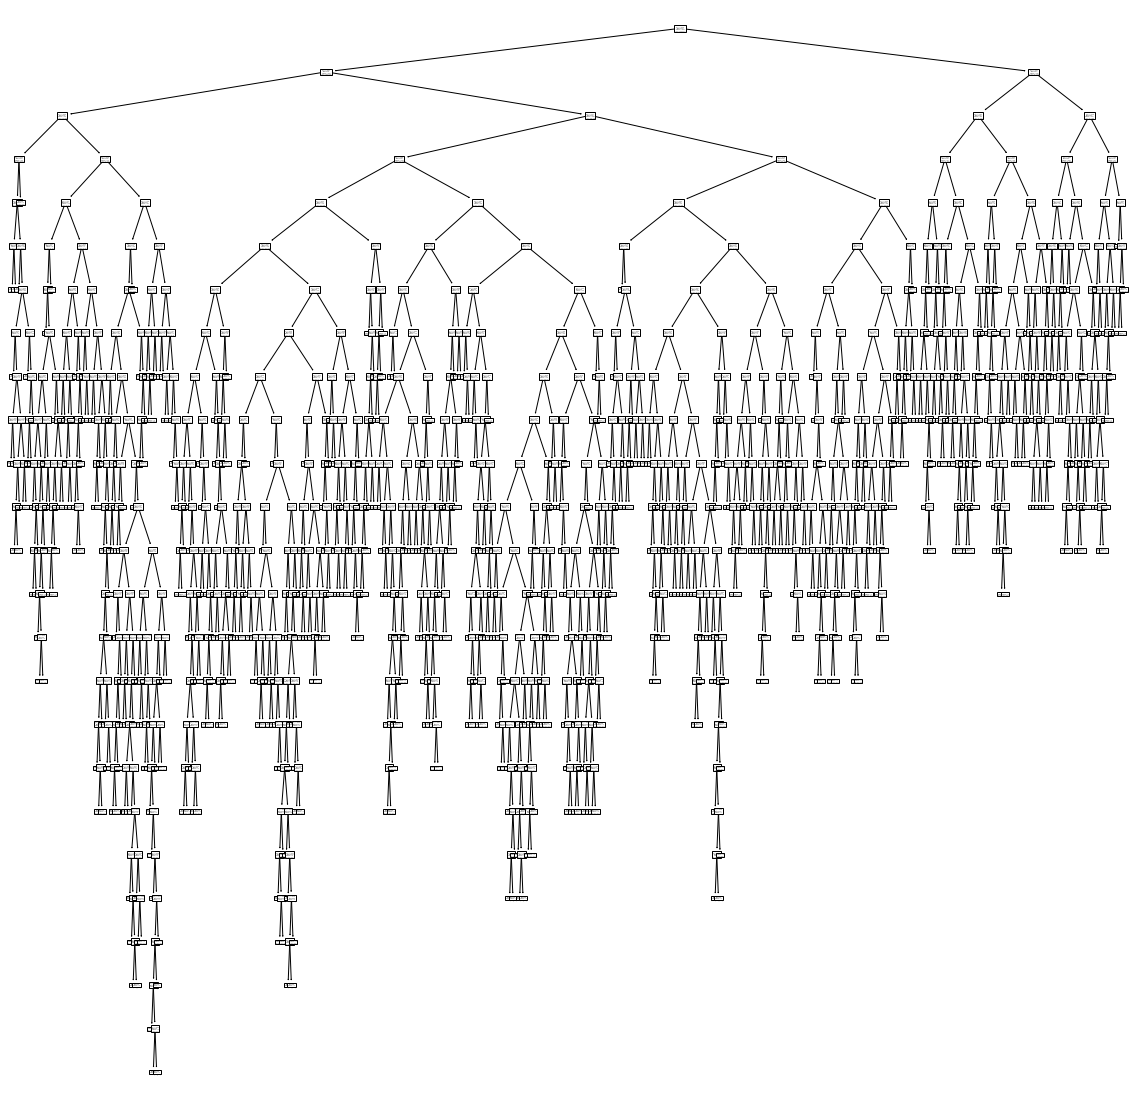

In [70]:
plt.figure(figsize=(20,20))
plot_tree(dt)
plt.show()

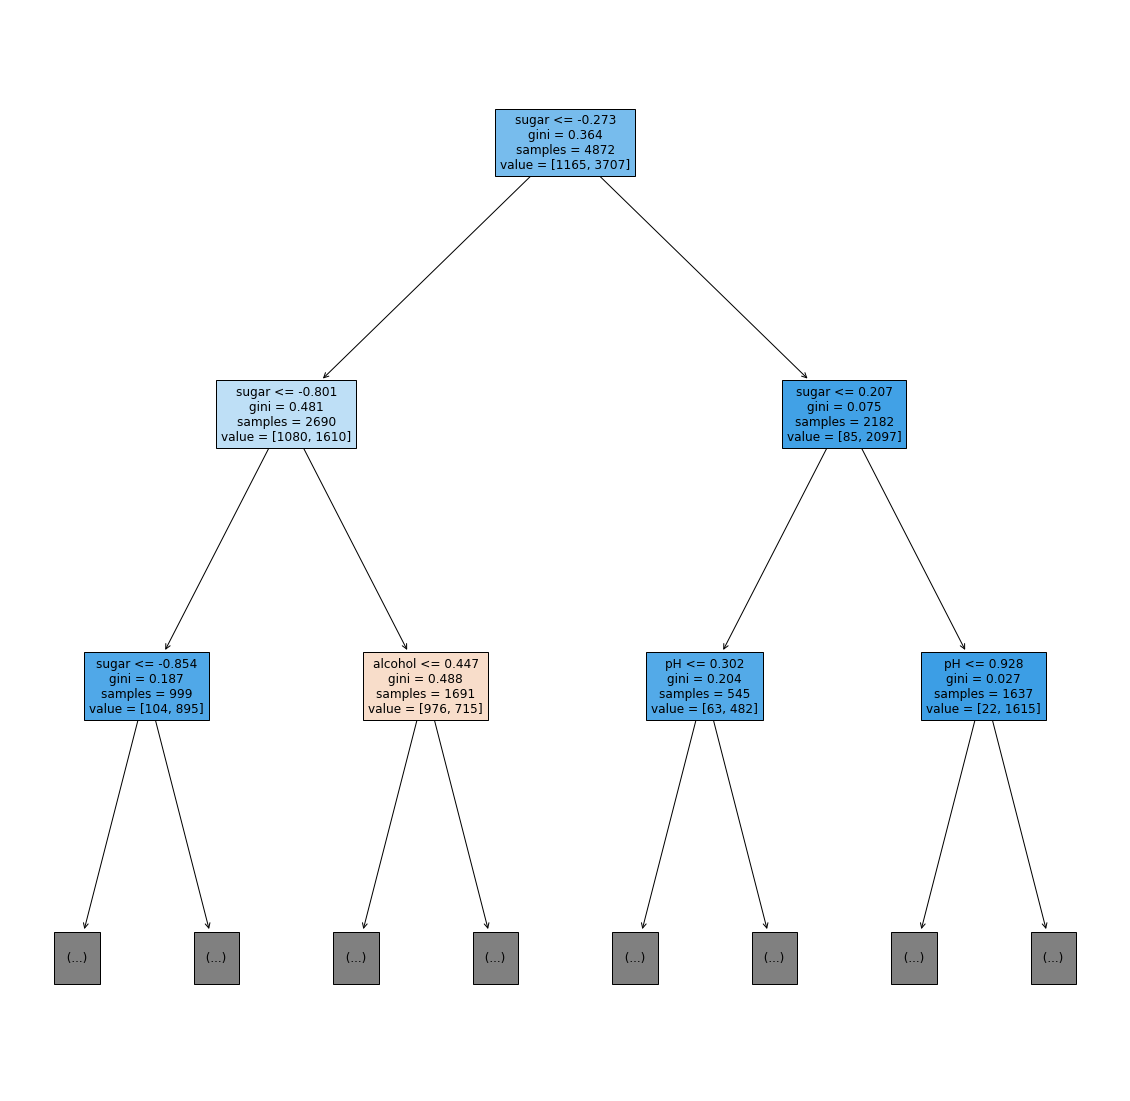

In [73]:
# max_depth : 트리의 깊이(첫번째를 제외하고 2개까지 만들기)
# filled : 독립변수별로 색으로 구분
# feature_names : 사용된 독립변수 이름

plt.figure(figsize=(20,20))
plot_tree(dt, max_depth=2, filled=True, \
          feature_names=['alcohol','sugar','pH'])
plt.show()

# - gini : 불순도
# - samples : 훈련에 사용된 총 데이터수
# - value : 범주별로 사용된 데이터수

# - 가장 첫번째 트리 : 루트노드(root node)
# - 가장 아래 트리 : 리프노드(leaf node)

## 가지치기
##### - max_depth : 트리의 갯수로 제한
##### - 트리가 너무 뻗어 나가도 정확도가 떨어집니다.
##### - 제한 없이 뻗어나가는 것을 max_depth로 제어

In [ ]:
### max_depth를 3으로 해서 다시 훈련을 시켜주세요..
# - 훈련/테스트 정확도 확인까지..
# - 트리 시각화까지..

In [80]:
dt = DecisionTreeClassifier(max_depth = 3, random_state = 42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.8499589490968801
0.8363076923076923


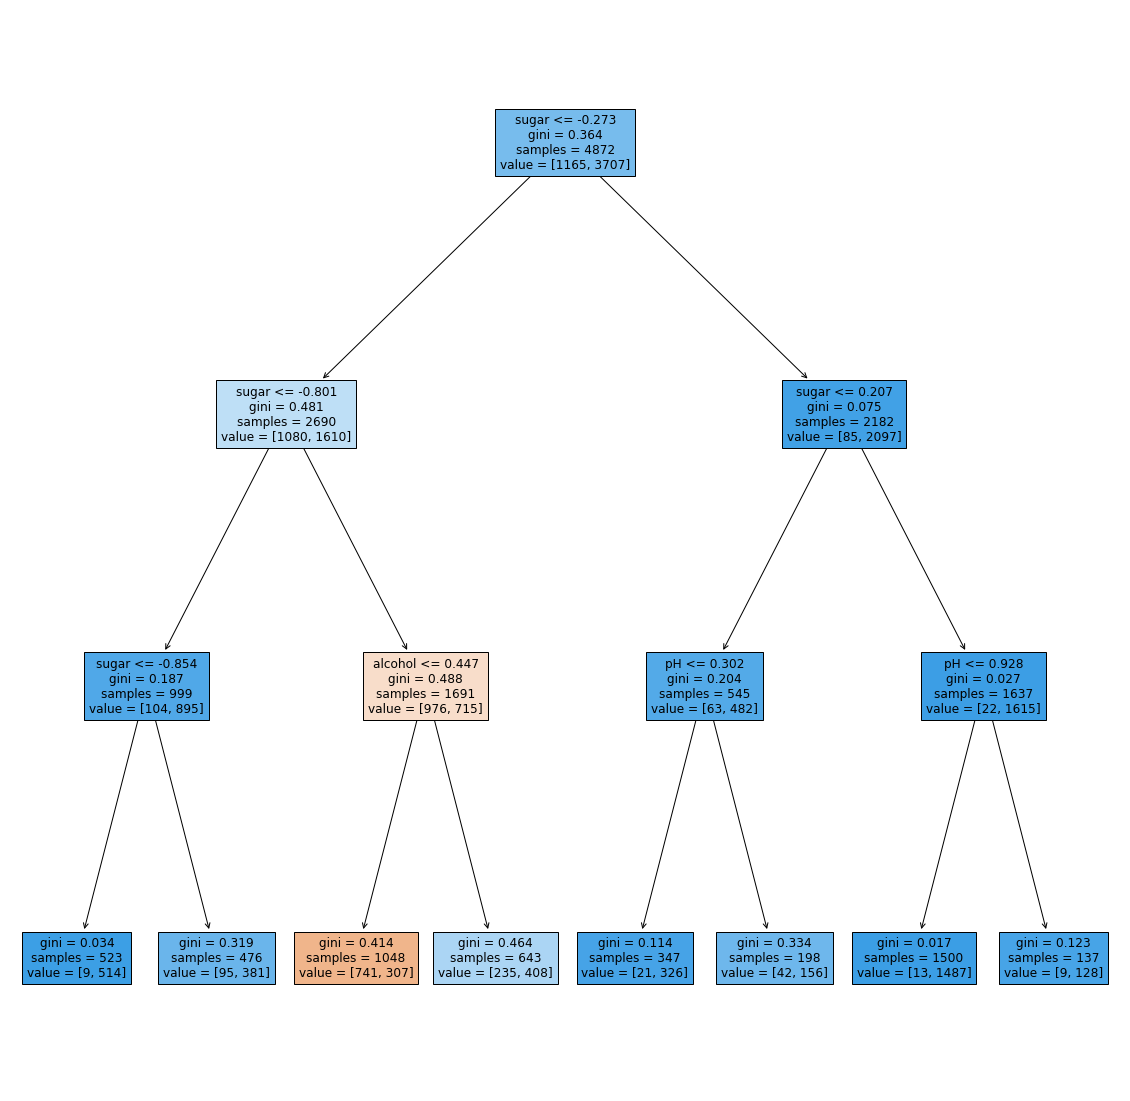

In [81]:
plt.figure(figsize=(20,20))
plot_tree(dt, filled=True, \
          feature_names=['alcohol','sugar','pH'])
plt.show()

## 특성중요도

In [ ]:
### 트리 훈련에 사용된 독립변수(특성=피쳐)들의 정확도 확인
# - 정확도가 가장 높은 독립변수가 훈련에 영향을 가장 많이 미쳤다고 판단

In [82]:
print(dt.feature_importances_)

[0.12871631 0.86213285 0.00915084]


In [115]:
n = [['alcohol', 'sugar', 'pH'], ['alcohol', 'sugar'], ['alcohol','pH'], ['sugar', 'pH'], ['alcohol'], ['sugar'], ['pH']]

In [122]:
for d in n:
    for i in range(1, 10):
        wine_input = wine[d].to_numpy()
        train_input, test_input, train_target, test_target = \
        train_test_split(wine_input, wine_target, random_state=42)
        ss.fit(train_input)
        train_scaled = ss.transform(train_input)
        test_scaled = ss.transform(test_input)
        dt = DecisionTreeClassifier(max_depth = i, random_state = 42)
        dt.fit(train_scaled, train_target)
        print(d, 'max_depth =', i)
        print(dt.score(train_scaled, train_target))
        print(dt.score(test_scaled, test_target))
        print(dt.score(train_scaled, train_target) - dt.score(test_scaled, test_target))
        print('\n')

['alcohol', 'sugar', 'pH'] max_depth = 1
0.7608784893267652
0.7329230769230769
0.027955412403688262


['alcohol', 'sugar', 'pH'] max_depth = 2
0.8144499178981938
0.8086153846153846
0.00583453328280914


['alcohol', 'sugar', 'pH'] max_depth = 3
0.8499589490968801
0.8363076923076923
0.013651256789187771


['alcohol', 'sugar', 'pH'] max_depth = 4
0.8630952380952381
0.8498461538461538
0.01324908424908433


['alcohol', 'sugar', 'pH'] max_depth = 5
0.8725369458128078
0.8584615384615385
0.014075407351269331


['alcohol', 'sugar', 'pH'] max_depth = 6
0.8770525451559934
0.8541538461538462
0.02289869900214725


['alcohol', 'sugar', 'pH'] max_depth = 7
0.8916256157635468
0.8523076923076923
0.0393179234558545


['alcohol', 'sugar', 'pH'] max_depth = 8
0.9033251231527094
0.8473846153846154
0.055940507768094005


['alcohol', 'sugar', 'pH'] max_depth = 9
0.9217980295566502
0.8529230769230769
0.06887495263357335


['alcohol', 'sugar'] max_depth = 1
0.7608784893267652
0.7329230769230769
0.0279554124036

In [ ]:
# ['alcohol', 'sugar'] max_depth = 3 선택

In [ ]:
### <출력 결과>
# - class_pred가 추가된 데이터프레임 출력
#   (출력결과) 데이터프레임의 5개 컬럼 모두 출력
#   alcohol, sugar, pH, class, class_pred

# - 정답을 맞춘 갯수와 틀린 갯수 출력하기
#   (출력 예시) 총 갯수[6497]건 중에, 정답갯수[5488]건, 오답 갯수[1009]건

# - 정답률과 오답률 출력하기
#   (출력 예시) 총 100.0% 중 정답률[84.47%], 오답률[15.53%]

In [125]:
wine_input = wine[['alcohol', 'sugar']].to_numpy()
train_input, test_input, train_target, test_target = \
train_test_split(wine_input, wine_target, random_state=42)
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)
dt = DecisionTreeClassifier(max_depth = 3, random_state = 42)
dt.fit(train_scaled, train_target)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [130]:
wine_test = wine.copy()

In [133]:
wine_scaled = ss.transform(wine_input)
wine_pred = dt.predict(wine_scaled)
wine_test['class_pred'] = pd.Series(wine_pred)
wine_test

,alcohol,sugar,pH,class,class_pred
0,9.4,1.9,3.51,0.0,0.0
1,9.8,2.6,3.20,0.0,0.0
2,9.8,2.3,3.26,0.0,0.0
3,9.8,1.9,3.16,0.0,0.0
4,9.4,1.9,3.51,0.0,0.0
...,...,...,...,...,...
6492,11.2,1.6,3.27,1.0,1.0
6493,9.6,8.0,3.15,1.0,1.0
6494,9.4,1.2,2.99,1.0,1.0
6495,12.8,1.1,3.34,1.0,1.0


In [135]:
print('총 갯수 [{}]건 중에, 정답갯수[{}]건, 오답 갯수[{}]건'.format(len(wine_pred), \
    sum(wine_test['class'] == wine_test['class_pred']), \
    len(wine_test)-sum(wine_test['class'] == wine_test['class_pred'])))

총 갯수 [6497]건 중에, 정답갯수[5500]건, 오답 갯수[997]건


In [136]:
print('총 100.0% 중 정답률[{}%], 오답률[{}%]' \
      .format(round(sum(wine_test['class'] == wine_test['class_pred'])/len(wine_test) * 100, 2), \
              round(100 - sum(wine_test['class'] == wine_test['class_pred'])/len(wine_test) * 100, 2)))

총 100.0% 중 정답률[84.65%], 오답률[15.35%]


In [ ]:
# [문제] 와인 데이터 사용
# 와인의 화학 조성을 사용하여 와인의 종류 예측 (자유롭게)..

# ** 특성 이름을 담고 있는 key 값 = feature_names
# ** 특성 데이터를 담고 있는 key 값 = data
# ** 범주 와인의 종류를 담고 있는 key 값 = target_names
#     - 범주는 'class_0'과 'class_1'만 사용 (0과 1로 변경하여 사용)
#     - (0 = 레드와인, 1 = 화이트와인)

# 알콜(Alcohol)
# 말산(Malic acid)
# 화분

##### - [지금까지 배운 모든 분류모델] 적용해보기
##### - 독립변수 : 특성을 자유롭게 조합해 가면서 검증해 보기
##### - ..........(특성을 자유롭게 조합하여 적용해 가면서 정확도 차이 확인)
##### - ..........(전체 특성을 모두 적용도 해보세요)
##### - 사용한 모델별로, 예측(predict) 을 통한 결과를, 데이터프레임에 col_predict 컬럼명으로 추가하기

In [137]:
from sklearn.datasets import load_wine

wine_all = load_wine()
print(wine_all)

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
 